# UN Data Project - GDP and Internet Usage

In [1095]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Using the pandas read_csv() method, read the GDP dataset into your notebook as a DataFrame called gdp_df. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [1096]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


<b>How many rows and columns are in gdp_df? What are the data types of each column?</b>

In [1097]:
print(gdp_df.dtypes)

Country or Area     object
Year                 int64
Value              float64
Value Footnotes    float64
dtype: object


There are 7,175 rows and 4 columns. The column data types can be seen in the above cell.

<b>Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.</b>

In [1098]:
gdp_df.drop('Value Footnotes', axis=1, inplace=True)
gdp_df.rename(columns={'Country or Area': 'Country', 'Value': 'GDP_Per_Capita'}, inplace=True)
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2020     1970.560169
1  Afghanistan  2019     2065.036235
2  Afghanistan  2018     2033.804389
3  Afghanistan  2017     2058.400221
4  Afghanistan  2016     2057.067978


<b>How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice?</b>

In [1099]:
min_year = gdp_df['Year'].min()
max_year = gdp_df['Year'].max()

# Using a lambda function to filter for countries with data for every year
countries_with_data_df = gdp_df.groupby('Country').filter(lambda x: len(x) == (max_year - min_year + 1)).nunique()
print('Number of countries with data all years: ', countries_with_data_df['Country'])

# We are defining many years as 10 or more years of data
countries_missing_data_df = gdp_df.groupby('Country').filter(lambda x: len(x) < (max_year - min_year - 10)).nunique()
print('Number of countries missing 10+ years:   ', countries_missing_data_df['Country'])

# Getting the number of observations per year
observations_per_year_df = gdp_df.groupby('Year').count()
print(observations_per_year_df['Country'])


Number of countries with data all years:  205
Number of countries missing 10+ years:    8
Year
1990    206
1991    207
1992    208
1993    209
1994    211
1995    222
1996    222
1997    226
1998    226
1999    227
2000    233
2001    234
2002    235
2003    235
2004    236
2005    236
2006    237
2007    237
2008    238
2009    239
2010    239
2011    240
2012    240
2013    242
2014    242
2015    242
2016    242
2017    242
2018    242
2019    241
2020    240
Name: Country, dtype: int64


205 countries have data reported for every year. 8 countries have missed 10 or more years. The total number of observations per year has steadily increased until 2019 and 2020 where 1 and 2 countries, respectively, did not report data.

<b>In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?</b>

Text(0.5, 1.0, 'GDP Per Capita in 2020')

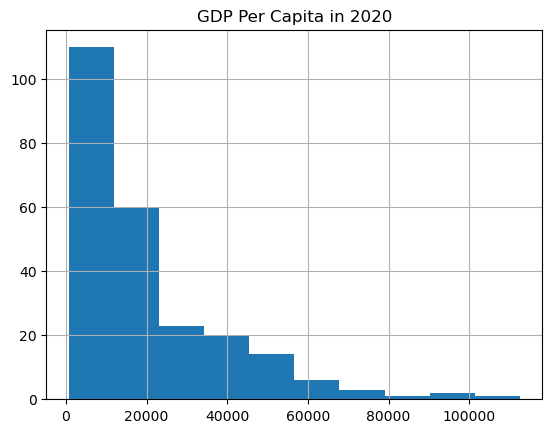

In [1100]:
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]

gdp_df_2020.hist('GDP_Per_Capita')
plt.title('GDP Per Capita in 2020')

Text(0.5, 1.0, 'GDP Per Capita in 2020')

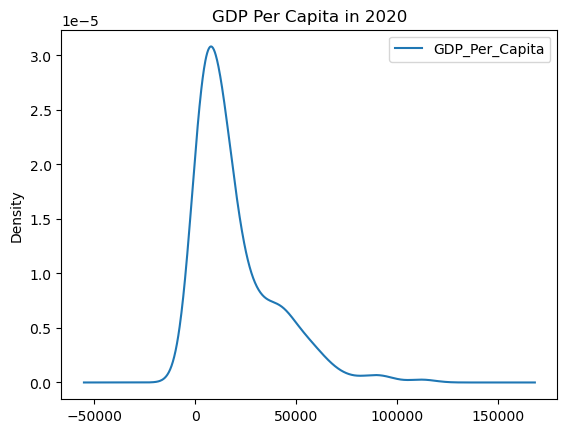

In [1101]:
gdp_df_2020.plot(kind='density', x='Country', y='GDP_Per_Capita')
plt.title('GDP Per Capita in 2020')

Text(0.5, 1.0, 'GDP Per Capita in 2020')

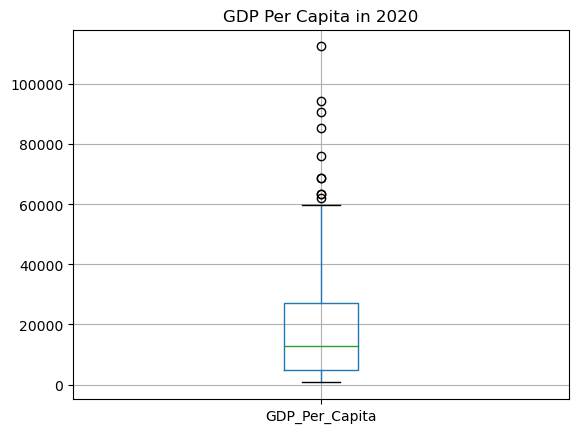

In [1102]:

gdp_df_2020.boxplot('GDP_Per_Capita')
plt.title('GDP Per Capita in 2020')

Text(0.5, 1.0, 'GDP Per Capita in 2020')

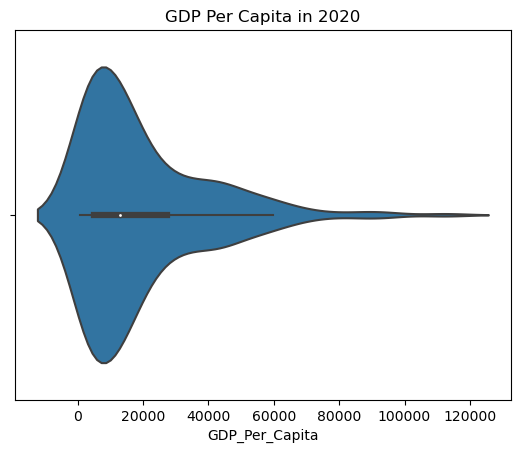

In [1103]:
sns.violinplot(x='GDP_Per_Capita', data=gdp_df_2020)
plt.title('GDP Per Capita in 2020')

All of the graphs give the same information; however, the violin plot and density plot quickly show where the majority of countries reside while the box plot better defines the outliers.

<b>What was the median GDP per capita value in 2020?</b>

In [1104]:
median_gdp_2020 = gdp_df_2020['GDP_Per_Capita'].median()
print('Median GDP Per Capita in 2020: $', round(median_gdp_2020, 2))

Median GDP Per Capita in 2020: $ 12908.94


<b>For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:

* A boxplot
* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
* A scatterplot
* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)

Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.</b>

<Axes: title={'center': 'GDP_Per_Capita'}, xlabel='Year', ylabel='GDP Per Capita'>

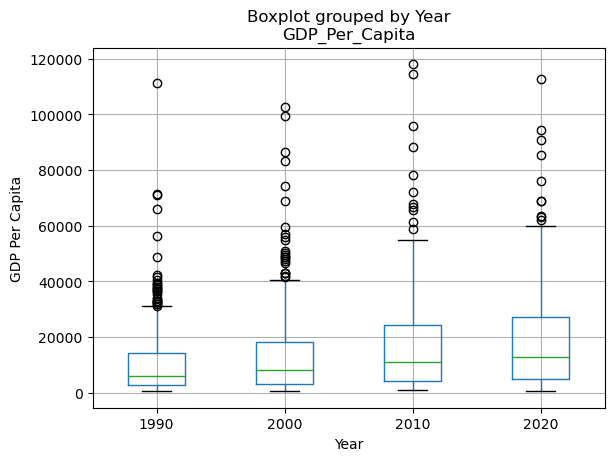

In [1105]:
gdp_df_1990 = gdp_df[gdp_df['Year'] == 1990]
gdp_df_2000 = gdp_df[gdp_df['Year'] == 2000]
gdp_df_2010 = gdp_df[gdp_df['Year'] == 2010]
gdp_df_2020 = gdp_df[gdp_df['Year'] == 2020]

gdp_decades = pd.concat([gdp_df_1990, gdp_df_2000, gdp_df_2010, gdp_df_2020])

gdp_decades.boxplot('GDP_Per_Capita', by='Year', ylabel='GDP Per Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

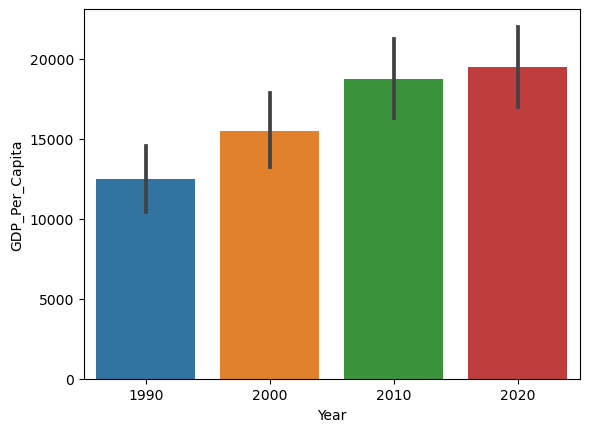

In [1106]:
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

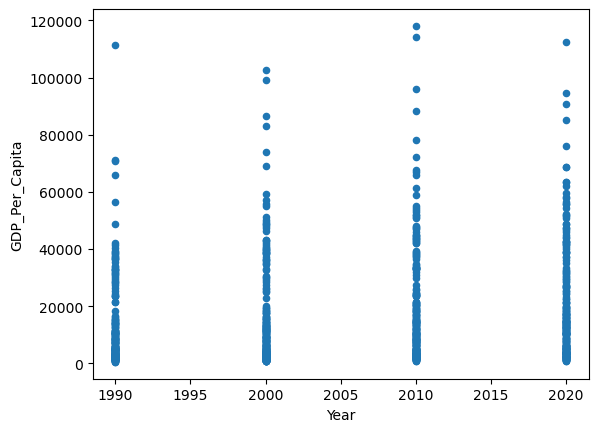

In [1107]:
gdp_decades.plot.scatter(x='Year', y='GDP_Per_Capita')

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

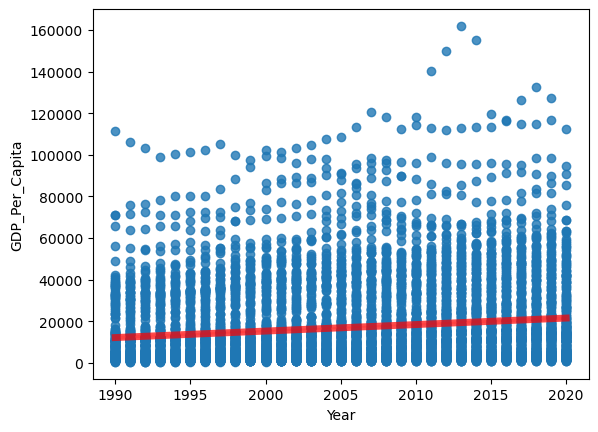

In [1108]:
sns.regplot(x=gdp_df['Year'], y=gdp_df['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})

<b>Which country was the first to have a GDP per capita greater than $100,000?</b>

In [1109]:
gdp_df_ordered_by_year_asc = gdp_df.sort_values(by=['Year', 'GDP_Per_Capita'], ascending=True)
first_country_to_achieve_10000_gdp = gdp_df_ordered_by_year_asc[gdp_df_ordered_by_year_asc['GDP_Per_Capita'] > 100000].iloc[0]
print('The first country to reach > $100,000 GDP per capita was', first_country_to_achieve_10000_gdp['Country'], 'in', first_country_to_achieve_10000_gdp['Year'])

The first country to reach > $100,000 GDP per capita was United Arab Emirates in 1990


<b>Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.</b>

The country with the highest GDP per capita in 2020 was Luxembourg with a GDP per capita of $ 112557.31 .


Text(0.5, 1.0, 'Luxembourg GDP Per Capita 1990-2020')

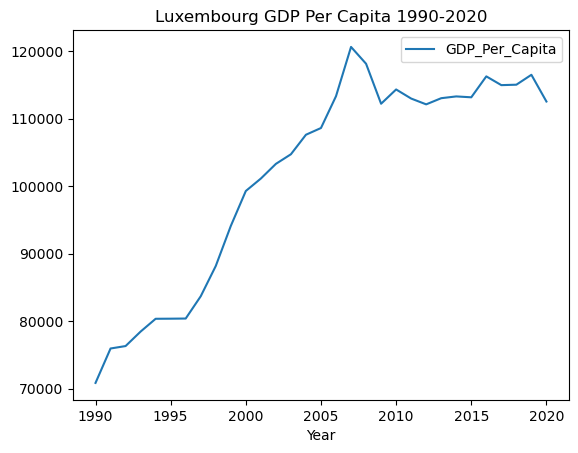

In [1110]:
countries_2020_df = gdp_df[gdp_df['Year'] == 2020]
top_country_2020_df = countries_2020_df.sort_values(by='GDP_Per_Capita', ascending=False).head(1)
luxembourg_gdp_df = gdp_df[gdp_df['Country'] == 'Luxembourg']
print('The country with the highest GDP per capita in 2020 was', top_country_2020_df.iloc[0]['Country'], 'with a GDP per capita of $', round(top_country_2020_df.iloc[0]['GDP_Per_Capita'], 2), '.')
luxembourg_gdp_df.plot(kind='line', x='Year', y='GDP_Per_Capita')
plt.title('Luxembourg GDP Per Capita 1990-2020')

<b>Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset. Bonus question: Is it true in general that coutries had a higher GDP per capita in 2020 than in 1990? Which countries had lower GDP per capita in 2020 than in 1990?</b>

The country with the lowest GDP per capita in 2020 was Burundi with a GDP per capita of $ 731.06 .


Text(0.5, 1.0, 'Burundi GDP Per Capita 1990-2020')

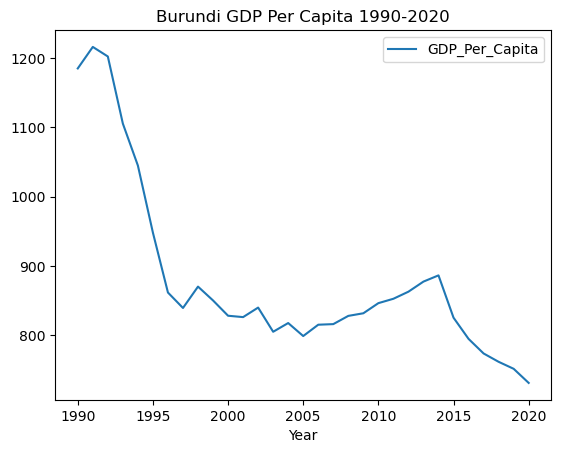

In [1111]:
bottom_country_2020_df = countries_2020_df.sort_values(by='GDP_Per_Capita', ascending=True).head(1)
burundi_gdp_df = gdp_df[gdp_df['Country'] == 'Burundi']
print('The country with the lowest GDP per capita in 2020 was', bottom_country_2020_df.iloc[0]['Country'], 'with a GDP per capita of $', round(bottom_country_2020_df.iloc[0]['GDP_Per_Capita'], 2), '.')
burundi_gdp_df.plot(kind='line', x='Year', y='GDP_Per_Capita')
plt.title('Burundi GDP Per Capita 1990-2020')

In [1112]:
# Bonus portion - loop through every country's first and last entry
# and determine if the latter entry is greater than the former

<b>Read in the internet use dataset into a DataFrame named internet_df. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.</b>

In [1113]:
internet_df = pd.read_csv('../data/internet_use.csv', on_bad_lines='skip')
print(internet_df.head())
print(internet_df.tail())
print(internet_df.dtypes)

  Country or Area  Year     Value  Value Footnotes
0     Afghanistan  2014  6.390000              NaN
1     Afghanistan  2013  5.900000              NaN
2     Afghanistan  2012  5.454545              NaN
3     Afghanistan  2011  5.000000              NaN
4     Afghanistan  2010  4.000000              NaN
     Country or Area                                               Year  \
4670             175             Includes individuals 3 years and older   
4671             176                                   NTIA/CPS survey.   
4672             178  Estimated based on Survey's results. Populatio...   
4673             179                     Preliminary. Country estimate.   
4674             180  The methodology used to estimated the figure f...   

      Value  Value Footnotes  
4670    NaN              NaN  
4671    NaN              NaN  
4672    NaN              NaN  
4673    NaN              NaN  
4674    NaN              NaN  
Country or Area     object
Year                object
Val

<b>Drop the Value Footnotes column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.</b>

In [1114]:
# Dropping rows with NaN values
internet_df.dropna(inplace=True)

# Change year to integer
internet_df['Year'] = internet_df['Year'].astype(int)

internet_df.drop('Value Footnotes', axis=1, inplace=True)
internet_df.rename(columns={'Country or Area': 'Country', 'Value': 'Internet_Users_Pct'}, inplace=True)
print(internet_df.head())

                 Country  Year  Internet_Users_Pct
101  Antigua and Barbuda  2011                52.0
122            Argentina  2011                51.0
144              Armenia  2013                41.9
184            Australia  2013                83.0
185            Australia  2012                79.0


<b>Look at the number of observations in this dataset per year. What do you notice?</b>

The number of observations is slightly over half the amount of GDP records.

<b>What is the first year to have a non-zero internet users percentage value?</b>

In [1115]:
internet_pct_by_year_df = internet_df.groupby('Year').mean(numeric_only=True)
first_year_1_pct = internet_pct_by_year_df[internet_pct_by_year_df['Internet_Users_Pct'] >= 1].index[0]
print('The first year that 1% of the world population or more had access to the internet was', first_year_1_pct, '.')

The first year that 1% of the world population or more had access to the internet was 1995 .


<b>How does the distribution of internet users percent differ for 2000 and 2014?</b>

<Axes: xlabel='Year', ylabel='Internet_Users_Pct'>

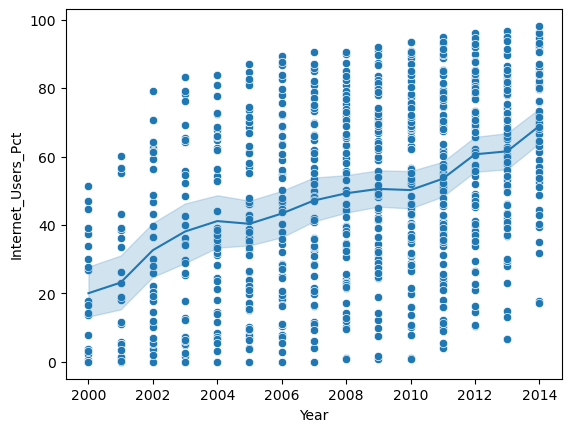

In [1116]:
internet_pct_2000_to_2014_df = internet_df[internet_df['Year'].between(2000, 2014)]
internet_pct_2000_to_2014_ordered = internet_pct_2000_to_2014_df.sort_values(by='Year', ascending=True)

sns.scatterplot(data=internet_pct_2000_to_2014_ordered, x="Year", y="Internet_Users_Pct")
sns.lineplot(data=internet_pct_2000_to_2014_ordered, x="Year", y="Internet_Users_Pct")


The distribution of internet users via the data clearly shows an upward trend of internet adoption throughout the entire world from 2000 to 2014.

<b>For how many countries was the percentage of internet users below 5% in 2014?</b>

In [1117]:
internet_pct_2014_df = internet_df[internet_df['Year'] == 2014]
internet_pct_2014_lt_5_df = internet_pct_2014_df[internet_pct_2014_df['Internet_Users_Pct'] < 5]
print('The number of countries where Internet_Users_Pct is less than 5% in 2014 is', len(internet_pct_2014_lt_5_df), '.')

The number of countries where Internet_Users_Pct is less than 5% in 2014 is 0 .


<b>Merge the two DataFrames to one. Do this in a way that keeps all rows from each of the two DataFrames. Call the new DataFrame gdp_and_internet_use. Look at the first and last few rows to confirm that it merged correctly.</b>

In [1118]:
# Merging the two dataframes into one
gdp_and_internet_use = pd.merge(gdp_df, internet_df, on=['Country', 'Year'], how='outer')
print(gdp_and_internet_use.head())
print(gdp_and_internet_use.tail())

               Country  Year  GDP_Per_Capita  Internet_Users_Pct
0  Antigua and Barbuda  2011    17605.438968                52.0
1            Argentina  2011    24647.629274                51.0
2              Armenia  2013    10691.276747                41.9
3            Australia  2013    46744.632542                83.0
4            Australia  2012    46350.919952                79.0
     Country  Year  GDP_Per_Capita  Internet_Users_Pct
784  Uruguay  2010    19293.740798                46.4
785  Uruguay  2009    17948.428952                41.8
786  Uruguay  2008    17266.530476                39.3
787  Uruguay  2007    16151.369532                34.0
788   Zambia  2011     3201.288029                11.5


<b>Find the three countries with the highest internet users percentage in 2014. Use a seaborn FacetGrid (https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) to compare how the GDP per capita has changed over time for these three countries. What do you notice?</b>

The top 3 countries for Internet_Users_Pct in 2014 were ['Iceland', 'Norway', 'Denmark'] .


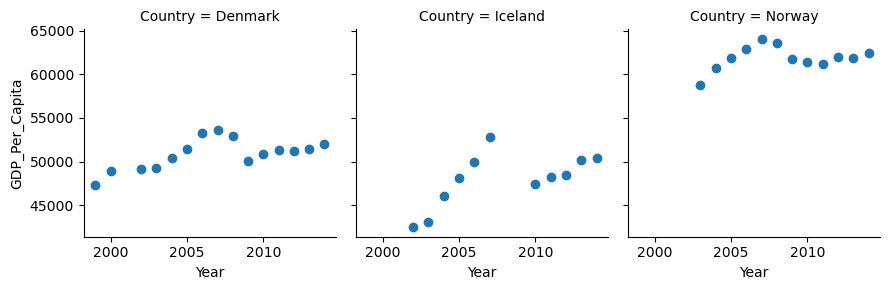

In [1119]:
top_3_internet_pct_2014_df = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014].sort_values(by='Internet_Users_Pct', ascending=False).head(3)
print('The top 3 countries for Internet_Users_Pct in 2014 were', top_3_internet_pct_2014_df['Country'].to_list(), '.')

top_3_internet_pct_df = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(top_3_internet_pct_2014_df['Country'])]

sns.FacetGrid(top_3_internet_pct_df, col='Country').map(plt.scatter, 'Year', 'GDP_Per_Capita')

All of the countries growth and shrink patterns correlate. 2008 - 2009 saw all three countries' GDP per capitas drop, while every other year it increased or stayed constant.

<b>Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.</b>

In [1120]:
# Subset gdp_and_internet_use to just the year 2014. Save this as a new dataframe named gdp_and_internet_use_2014.
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

<b>Create a plot which compares Internet Users Percentage and GDP per Capita for the year 2014. What do you notice from this plot? If you see any unusual points, investigate them.</b>

<Axes: xlabel='Internet_Users_Pct', ylabel='GDP_Per_Capita'>

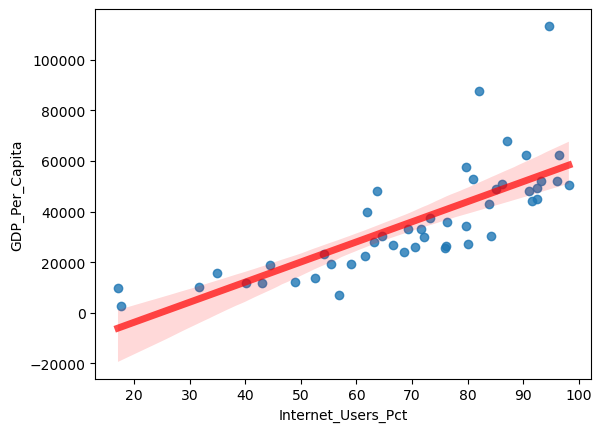

In [1121]:
# Create a line plot which compares Internet Users Percentage and GDP per Capita for the year 2014
sns.regplot(x=gdp_and_internet_use_2014['Internet_Users_Pct'], y=gdp_and_internet_use_2014['GDP_Per_Capita'], line_kws={'color':'r', 'alpha':0.7, 'lw':5})

I notice from the above graph that there seems to possibly be a positive correlation between GDP per capita and internet users percentage. You might infer that as the percentage of internet users increases, the GDP per capita will increase.

<b>Stretch Question: Use the qcut function from pandas (https://pandas.pydata.org/docs/reference/api/pandas.qcut.html) to divide countries in gdp_per_capita_2014 into three groups based on their GDP per capita values. Label these groups as "Low", "Medium", and "High". Put these labels in a new column, named "GDP_group".</b>

In [1122]:
gdp_and_internet_use['GDP_group'] = pd.qcut(gdp_and_internet_use.loc[:, ('GDP_Per_Capita')], 3, labels=['Low', 'Medium', 'High'])
print(gdp_and_internet_use.head())

               Country  Year  GDP_Per_Capita  Internet_Users_Pct GDP_group
0  Antigua and Barbuda  2011    17605.438968                52.0       Low
1            Argentina  2011    24647.629274                51.0    Medium
2              Armenia  2013    10691.276747                41.9       Low
3            Australia  2013    46744.632542                83.0      High
4            Australia  2012    46350.919952                79.0      High


<b>Stretch Question: How does the median internet users percentage compare for the three gdp groups?</b>

In [1123]:
print(gdp_and_internet_use.groupby('GDP_group')['Internet_Users_Pct'].median())

GDP_group
Low       21.60
Medium    53.63
High      76.26
Name: Internet_Users_Pct, dtype: float64


It appears to corroborate earlier findings where - whether related or not - the higher the median internet user's percentage, the higher the GDP per capita.

<b>BONUS: Download another data set from the UN data (http://data.un.org/Explorer.aspx) to merge with your data and explore.</b>

In [1124]:
# Reading in an excel file into a dataframe
xlsx = pd.ExcelFile('../data/currently_married_men_and_women.xlsx')
currently_married_df = pd.read_excel(xlsx, 'CURRENTLY_MARRIED')

# Dropping unnecessary columns
currently_married_df.drop(['ISO code', 'Period', 'Non-standard age groups', 'Source type', 'Source', 'Survey Name', 'Note on non-standard age groups', 'Note on country or population', 'Note on data source', 'Including consensual unions'], axis=1, inplace=True)
print(currently_married_df[currently_married_df['Country'] == 'Japan'])


    Country  Year    Sex  15-19  20-24  25-29  30-34  35-39  40-44  45-49  \
784   Japan  1970    Men    0.6    9.8   53.0   87.2   93.9   95.3   95.6   
785   Japan  1970  Women    1.8   27.7   80.3   89.9   89.6   86.9   82.6   
786   Japan  1985    Men    0.2    7.4   38.8   70.3   83.4   89.4   91.6   
787   Japan  1985  Women    0.9   18.0   67.8   86.2   88.3   88.4   87.0   
788   Japan  1995    Men    0.3    6.5   31.8   60.8   74.7   79.9   84.0   
789   Japan  1995  Women    0.6   12.6   49.8   76.6   84.9   86.3   85.3   
790   Japan  2005    Men    0.3    6.2   27.4   50.6   65.1   72.4   76.7   
791   Japan  2005  Women    0.8   10.4   38.2   62.8   73.8   78.7   81.5   
792   Japan  2010    Men    0.3    5.7   27.1   50.4   60.8   66.4   71.3   
793   Japan  2010  Women    0.6    9.5   37.1   60.8   69.8   73.2   76.4   

     50-54  55-59  60-64   65+  
784   95.2   93.7   90.5  76.0  
785   75.0   66.8   58.1  31.4  
786   92.6   93.0   92.3  82.0  
787   83.7   78.2   

<b>We are going to compare marriage rates with the GDP statistics to see if we can find any trends.</b>

In [1125]:
# Merging the currenlty_married_df and gdp_and_internet_use dataframes
currently_married_and_gdp_and_internet_use_df = pd.merge(currently_married_df, gdp_and_internet_use, on=['Country', 'Year'], how='inner')
print(currently_married_and_gdp_and_internet_use_df[currently_married_and_gdp_and_internet_use_df['Country'] == 'Japan'])

   Country  Year    Sex  15-19  20-24  25-29  30-34  35-39  40-44  45-49  \
74   Japan  2005    Men    0.3    6.2   27.4   50.6   65.1   72.4   76.7   
75   Japan  2005  Women    0.8   10.4   38.2   62.8   73.8   78.7   81.5   
76   Japan  2010    Men    0.3    5.7   27.1   50.4   60.8   66.4   71.3   
77   Japan  2010  Women    0.6    9.5   37.1   60.8   69.8   73.2   76.4   

    50-54  55-59  60-64   65+  GDP_Per_Capita  Internet_Users_Pct GDP_group  
74   78.9   82.3   85.6  83.4    38250.638011           66.921066    Medium  
75   81.8   80.1   77.0  47.8    38250.638011           66.921066    Medium  
76   75.1   77.3   80.5  81.8    38069.956039           78.210000    Medium  
77   79.0   79.1   76.6  49.6    38069.956039           78.210000    Medium  


It is hard to spot a trend with such a small range, but the initial observations are:

* Marriage rates are declining
* GDP_Per_Capita are not tightly correlated with marriage rates
* Internet_Users_Pct may be inversely correlated with marriage rates (Note: this could simply be a product of timeframe, more long term data would be required)